In [15]:
import pandas as pd

# 读取xlsx文件
file_path = '中医辨证.xlsx'  # 文件路径，请替换为实际路径
df = pd.read_excel(file_path)

# 提取第二列"病人症状"
symptom_data = df['病人症状']
# print(symptom_data)

# 提取所有可能的病症
all_symptoms = []
for symptoms in symptom_data:
    new=symptoms.split(',')
    for i in new:
        all_symptoms.append(i)  # 分割每条症状并加入集合
print(all_symptoms)


['消化不良', '便秘', '心悸', '失眠', '腰疼', '脱发', '眼干', '腹胀', '便秘', '哮喘', '胸闷气短', '消化不良', '神经衰弱', '失眠', '月经不调', '神经衰弱', '消化不良', '月经不调', '失眠', '眼干', '月经不调', '腹胀', '便秘', '哮喘', '胸闷气短', '消化不良', '腰疼', '脱发', '眼干', '心悸', '神经衰弱', '消化不良', '月经不调', '腰疼', '眼干', '月经不调', '心悸', '腹胀', '便秘', '消化不良', '心悸', '月经不调', '消化不良', '心悸', '失眠', '月经不调', '心悸', '神经衰弱', '消化不良', '便秘', '失眠', '月经不调', '胸闷气短', '心悸', '失眠', '脱发', '眼干', '月经不调', '哮喘', '胸闷气短', '心悸', '月经不调', '消化不良', '消化不良', '月经不调', '腹胀', '便秘', '消化不良', '失眠', '月经不调', '腰疼', '脱发', '眼干', '易怒', '失眠', '月经不调', '哮喘', '腰疼', '心悸', '腹胀', '失眠', '眼干', '月经不调', '失眠', '眼干', '月经不调', '消化不良', '便秘', '失眠', '月经不调', '消化不良', '便秘', '心悸', '神经衰弱', '消化不良', '便秘', '哮喘', '鼻炎', '脱发', '心悸', '腹胀', '心悸', '失眠', '月经不调', '腰疼', '眼干', '便秘', '心悸', '失眠', '心悸', '神经衰弱', '易怒', '消化不良', '神经衰弱', '消化不良', '心悸', '失眠', '月经不调', '哮喘', '胸闷气短', '心悸', '失眠', '眼干', '月经不调', '消化不良', '哮喘', '胸闷气短', '消化不良', '月经不调', '神经衰弱', '失眠', '月经不调', '心悸', '神经衰弱', '消化不良', '便秘', '腹胀', '便秘', '哮喘', '胸闷气短', '消化不良', '心悸', '月经不调', '胸闷气短', '消化不良', '便秘', '心悸

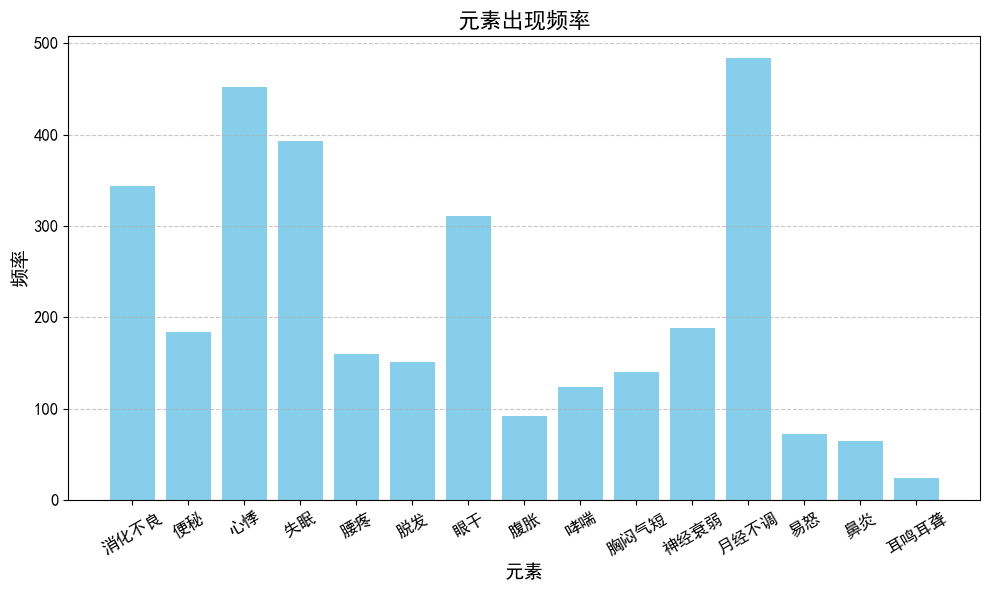

In [17]:
from collections import Counter
import matplotlib.pyplot as plt

def plot_frequency_bar_chart(data_list, title="元素出现频率", xlabel="元素", ylabel="频率"):
    plt.rcParams['font.sans-serif'] = ['SimHei']  # 设置字体为黑体以支持中文
    plt.rcParams['axes.unicode_minus'] = False  # 支持负号显示
    """
    统计列表中元素出现频率，并绘制条状图

    参数:
    data_list: list
        输入列表，包含元素
    title: str
        图表的标题
    xlabel: str
        X轴标签
    ylabel: str
        Y轴标签
    """
    # 统计元素出现频率
    counter = Counter(data_list)
    elements = list(counter.keys())
    frequencies = list(counter.values())

    # 创建条状图
    plt.figure(figsize=(10, 6))  # 设置画布大小
    plt.bar(elements, frequencies, color='skyblue')

    # 图表标题和标签设置
    plt.title(title, fontsize=16)
    plt.xlabel(xlabel, fontsize=14)
    plt.ylabel(ylabel, fontsize=14)
    
    # 避免中文显示问题
    plt.xticks(fontsize=12)  # 设置x轴刻度字体大小
    plt.yticks(fontsize=12)  # 设置y轴刻度字体大小
    plt.xticks(rotation=30, ha='center')  # 适当旋转x轴文字以便显示

    # 显示网格线
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    # 显示图表
    plt.tight_layout()
    plt.show()

# 示例用法
if __name__ == "__main__":
    data =all_symptoms
    plot_frequency_bar_chart(data)

In [ ]:


unique_list = []
for item in all_symptoms:
    if item not in unique_list:
        unique_list.append(item)

print(unique_list)
# 将病症排序，保证输出的顺序固定
sorted_symptoms = sorted(unique_list)
print(sorted_symptoms)

# # 创建病人症状向量化列表
vector_list = []
for symptoms in symptom_data:
    temp=[]
    symptom_vector = [1 if s in symptoms else 0 for s in sorted_symptoms]
    vector_list.append(symptom_vector)

# # 转化为DataFrame以便观察
# vector_df = pd.DataFrame(vector_list, columns=sorted_symptoms)

# # 打印结果
# print("病症特征向量列表：")
# print(vector_df)

# # 如果需要保存为新文件
# output_file_path = 'output_vectors.xlsx'
# vector_df.to_excel(output_file_path, index=False)

In [20]:
import pandas as pd
from apyori import apriori

# --------- 第 1 步：数据集准备 ---------
# 读取数据集
file_path = "中医辨证.xlsx"  # 请确保文件路径正确
df = pd.read_excel(file_path)

# 将第二列“病人症状”按逗号分割为列表
data = df['病人症状'].apply(lambda x: x.split(',')).tolist()

# 查看预处理后的数据
# print("预处理后的数据：")
# print(data)  # 每行是一个列表，表示一个病人的所有症状

# --------- 第 2 步：关联分析 ---------
# 设置支持度、置信度等参数，使用 apriori 函数
min_support = 0.1  # 最小支持度，调整为适合的数据集规模
min_confidence = 0.2 # 最低置信度
min_lift = 1.2  # 最低提升度

# 使用 apriori 函数生成关联分析结果
results = apriori(data,
                  min_support=min_support,
                  min_confidence=min_confidence,
                  min_lift=min_lift,
                  max_length=3)  # 最多考虑三项的频繁项集

# 将结果转换为列表
results = list(results)

# --------- 第 3 步：结果分析 ---------
# 解析 Apriori 的结果
print("\n生成的关联规则：")
for rule in results:
    items = list(rule.items)  # 获取规则中涉及的项
    support = rule.support  # 支持度
    for ordered_stat in rule.ordered_statistics:
        # 获取规则的前件（base）和后件（add）
        base = list(ordered_stat.items_base)
        add = list(ordered_stat.items_add)
        confidence = ordered_stat.confidence  # 置信度
        lift = ordered_stat.lift  # 提升度

        # 打印规则
        print(f"规则: {base} → {add}")
        print(f"支持度: {support:.2f}, 置信度: {confidence:.2f}, 提升度: {lift:.2f}")
        print("-" * 30)


生成的关联规则：
规则: ['便秘'] → ['消化不良']
支持度: 0.16, 置信度: 0.87, 提升度: 2.53
------------------------------
规则: ['消化不良'] → ['便秘']
支持度: 0.16, 置信度: 0.47, 提升度: 2.53
------------------------------
规则: ['失眠'] → ['心悸']
支持度: 0.22, 置信度: 0.55, 提升度: 1.23
------------------------------
规则: ['心悸'] → ['失眠']
支持度: 0.22, 置信度: 0.48, 提升度: 1.23
------------------------------
规则: ['失眠'] → ['月经不调']
支持度: 0.32, 置信度: 0.81, 提升度: 1.67
------------------------------
规则: ['月经不调'] → ['失眠']
支持度: 0.32, 置信度: 0.66, 提升度: 1.67
------------------------------
规则: ['心悸'] → ['神经衰弱']
支持度: 0.11, 置信度: 0.24, 提升度: 1.27
------------------------------
规则: ['神经衰弱'] → ['心悸']
支持度: 0.11, 置信度: 0.57, 提升度: 1.27
------------------------------
规则: ['消化不良'] → ['神经衰弱']
支持度: 0.16, 置信度: 0.48, 提升度: 2.54
------------------------------
规则: ['神经衰弱'] → ['消化不良']
支持度: 0.16, 置信度: 0.87, 提升度: 2.54
------------------------------
规则: ['眼干'] → ['脱发']
支持度: 0.14, 置信度: 0.46, 提升度: 3.05
------------------------------
规则: ['脱发'] → ['眼干']
支持度: 0.14, 置信度: 0.95, 提升度: 3.05
-----